# **Importando as bibliotecas**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import warnings
warnings.filterwarnings('ignore')

# **Lendo os dados**

In [2]:
df = pd.read_csv('adult.data.csv')
df.head(15)

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
5,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K
6,49,Private,160187,9th,5,Married-spouse-absent,Other-service,Not-in-family,Black,Female,0,0,16,Jamaica,<=50K
7,52,Self-emp-not-inc,209642,HS-grad,9,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,45,United-States,>50K
8,31,Private,45781,Masters,14,Never-married,Prof-specialty,Not-in-family,White,Female,14084,0,50,United-States,>50K
9,42,Private,159449,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,5178,0,40,United-States,>50K


In [3]:
df.shape

(32561, 15)

In [4]:
df.dtypes

age                int64
workclass         object
fnlwgt             int64
education         object
education-num      int64
marital-status    object
occupation        object
relationship      object
race              object
sex               object
capital-gain       int64
capital-loss       int64
hours-per-week     int64
native-country    object
income            object
dtype: object

In [5]:
df.isnull().sum()

age               0
workclass         0
fnlwgt            0
education         0
education-num     0
marital-status    0
occupation        0
relationship      0
race              0
sex               0
capital-gain      0
capital-loss      0
hours-per-week    0
native-country    0
income            0
dtype: int64

In [6]:
df.nunique()

age                  73
workclass             9
fnlwgt            21648
education            16
education-num        16
marital-status        7
occupation           15
relationship          6
race                  5
sex                   2
capital-gain        119
capital-loss         92
hours-per-week       94
native-country       42
income                2
dtype: int64

In [7]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
age,32561.0,38.581647,13.640433,17.0,28.0,37.0,48.0,90.0
fnlwgt,32561.0,189778.366512,105549.977697,12285.0,117827.0,178356.0,237051.0,1484705.0
education-num,32561.0,10.080679,2.572720,1.0,9.0,10.0,12.0,16.0
capital-gain,32561.0,1077.648844,7385.292085,0.0,0.0,0.0,0.0,99999.0
capital-loss,32561.0,87.303830,402.960219,0.0,0.0,0.0,0.0,4356.0
hours-per-week,32561.0,40.437456,12.347429,1.0,40.0,40.0,45.0,99.0


# **Contando os valores**

In [8]:
# Coluna workclass

df['workclass'].value_counts()

 Private             22696
 Self-emp-not-inc     2541
 Local-gov            2093
 ?                    1836
 State-gov            1298
 Self-emp-inc         1116
 Federal-gov           960
 Without-pay            14
 Never-worked            7
Name: workclass, dtype: int64

In [9]:
# Coluna marital-status

df['marital-status'].value_counts()

 Married-civ-spouse       14976
 Never-married            10683
 Divorced                  4443
 Separated                 1025
 Widowed                    993
 Married-spouse-absent      418
 Married-AF-spouse           23
Name: marital-status, dtype: int64

In [10]:
# Coluna gender
df['sex'].value_counts()

 Male      21790
 Female    10771
Name: sex, dtype: int64

In [11]:
# Coluna race

df['race'].value_counts()

 White                 27816
 Black                  3124
 Asian-Pac-Islander     1039
 Amer-Indian-Eskimo      311
 Other                   271
Name: race, dtype: int64

In [12]:
# Coluna occupation

df['occupation'].value_counts()

 Prof-specialty       4140
 Craft-repair         4099
 Exec-managerial      4066
 Adm-clerical         3770
 Sales                3650
 Other-service        3295
 Machine-op-inspct    2002
 ?                    1843
 Transport-moving     1597
 Handlers-cleaners    1370
 Farming-fishing       994
 Tech-support          928
 Protective-serv       649
 Priv-house-serv       149
 Armed-Forces            9
Name: occupation, dtype: int64

In [13]:
# Coluna native-country

df['native-country'].value_counts()

 United-States                 29170
 Mexico                          643
 ?                               583
 Philippines                     198
 Germany                         137
 Canada                          121
 Puerto-Rico                     114
 El-Salvador                     106
 India                           100
 Cuba                             95
 England                          90
 Jamaica                          81
 South                            80
 China                            75
 Italy                            73
 Dominican-Republic               70
 Vietnam                          67
 Guatemala                        64
 Japan                            62
 Poland                           60
 Columbia                         59
 Taiwan                           51
 Haiti                            44
 Iran                             43
 Portugal                         37
 Nicaragua                        34
 Peru                             31
 

In [14]:
# Coluna income

df['income'].value_counts()

 <=50K    24720
 >50K      7841
Name: income, dtype: int64

In [15]:
# Coluna education

df['education'].value_counts()

 HS-grad         10501
 Some-college     7291
 Bachelors        5355
 Masters          1723
 Assoc-voc        1382
 11th             1175
 Assoc-acdm       1067
 10th              933
 7th-8th           646
 Prof-school       576
 9th               514
 12th              433
 Doctorate         413
 5th-6th           333
 1st-4th           168
 Preschool          51
Name: education, dtype: int64

# **Tratando os dados**

In [16]:
# Substituindo valores nulos pela moda de cada coluna

df['workclass'] = df['workclass'].str.replace('?', 'Private', regex=True)
df['occupation'] = df['occupation'].str.replace('?', 'Prof-specialty', regex=True)
df['native-country'] = df['native-country'].str.replace('?', 'United-States', regex=True)

In [17]:
df.head(15)

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
5,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K
6,49,Private,160187,9th,5,Married-spouse-absent,Other-service,Not-in-family,Black,Female,0,0,16,Jamaica,<=50K
7,52,Self-emp-not-inc,209642,HS-grad,9,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,45,United-States,>50K
8,31,Private,45781,Masters,14,Never-married,Prof-specialty,Not-in-family,White,Female,14084,0,50,United-States,>50K
9,42,Private,159449,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,5178,0,40,United-States,>50K


In [18]:
# Simplificando variáveis da coluna education

df.education= df.education.replace(['Preschool', '1st-4th', '5th-6th', '7th-8th', '9th','10th', '11th', '12th'], 'school', regex=True)
df.education = df.education.replace('HS-grad', 'high school', regex=True)
df.education = df.education.replace(['Assoc-voc', 'Assoc-acdm', 'Prof-school', 'Some-college'], 'higher', regex=True)
df.education = df.education.replace('Bachelors', 'undergrad', regex=True)
df.education = df.education.replace('Masters', 'grad', regex=True)
df.education = df.education.replace('Doctorate', 'doc', regex=True)

In [19]:
# Simplificando variáveis da coluna marital-status

df['marital-status']= df['marital-status'].replace(['Married-civ-spouse', 'Married-AF-spouse'], 'married', regex=True)
df['marital-status']= df['marital-status'].replace(['Never-married'], 'not-married', regex=True)
df['marital-status']= df['marital-status'].replace(['Divorced', 'Separated','Widowed', 'Married-spouse-absent'], 'other', regex=True)

In [20]:
# Simplificando variáveis da coluna income

df.income = df.income.replace('<=50K', 0, regex=True)
df.income = df.income.replace('>50K', 1, regex=True)

In [21]:
df.head(5)

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,77516,undergrad,13,not-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,0
1,50,Self-emp-not-inc,83311,undergrad,13,married,Exec-managerial,Husband,White,Male,0,0,13,United-States,0
2,38,Private,215646,high school,9,other,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,0
3,53,Private,234721,school,7,married,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,0
4,28,Private,338409,undergrad,13,married,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,0


In [22]:
df['marital-status'].value_counts()

 married        14999
 not-married    10683
 other           6879
Name: marital-status, dtype: int64

In [23]:
df['education'].value_counts()

 high school    10501
 higher         10316
 undergrad       5355
 school          4253
 grad            1723
 doc              413
Name: education, dtype: int64

In [24]:
df['income'].value_counts()

0    24720
1     7841
Name: income, dtype: int64

# **Visualizando os dados**

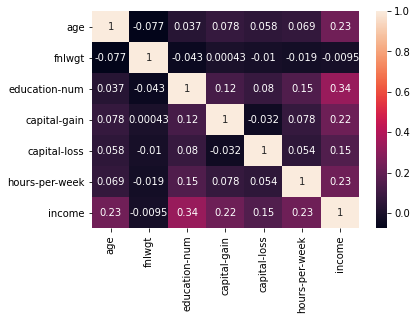

In [25]:
# Matriz de correlação (Quando mais proximo de 1, maior a correlação entre as variáveis)
  # Podemos notar uma relação acima da média entre a variável "income"(salário), com as variáveis "age"(idade), "education-num"(id relativo ao grau de educação).

sns.heatmap(df.corr(), annot=True)

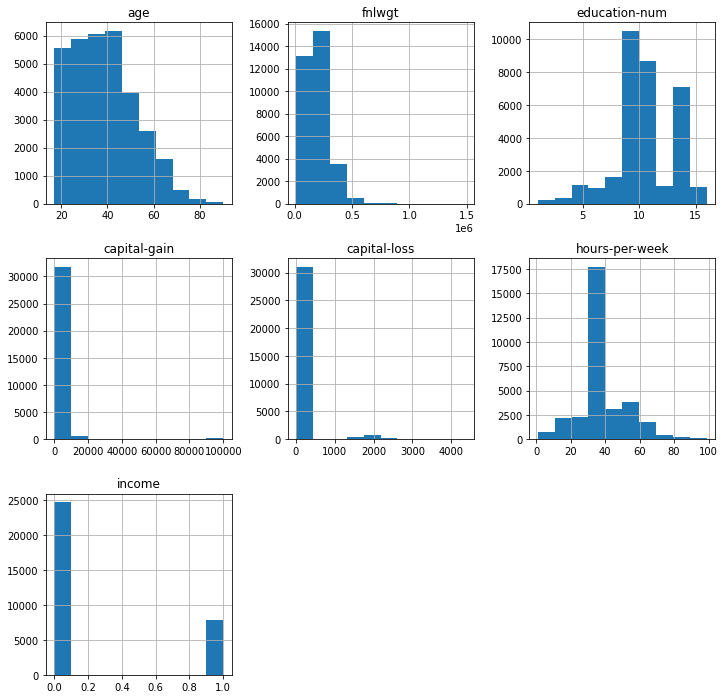

In [26]:
# Histograma, sendo : Variável (eixo x) vs Quantidade de indivíduos (eixo y)

df.hist(figsize=(12,12), layout=(3,3), sharex=False);

age                  AxesSubplot(0.125,0.657941;0.227941x0.222059)
fnlwgt            AxesSubplot(0.398529,0.657941;0.227941x0.222059)
education-num     AxesSubplot(0.672059,0.657941;0.227941x0.222059)
capital-gain         AxesSubplot(0.125,0.391471;0.227941x0.222059)
capital-loss      AxesSubplot(0.398529,0.391471;0.227941x0.222059)
hours-per-week    AxesSubplot(0.672059,0.391471;0.227941x0.222059)
income                  AxesSubplot(0.125,0.125;0.227941x0.222059)
dtype: object

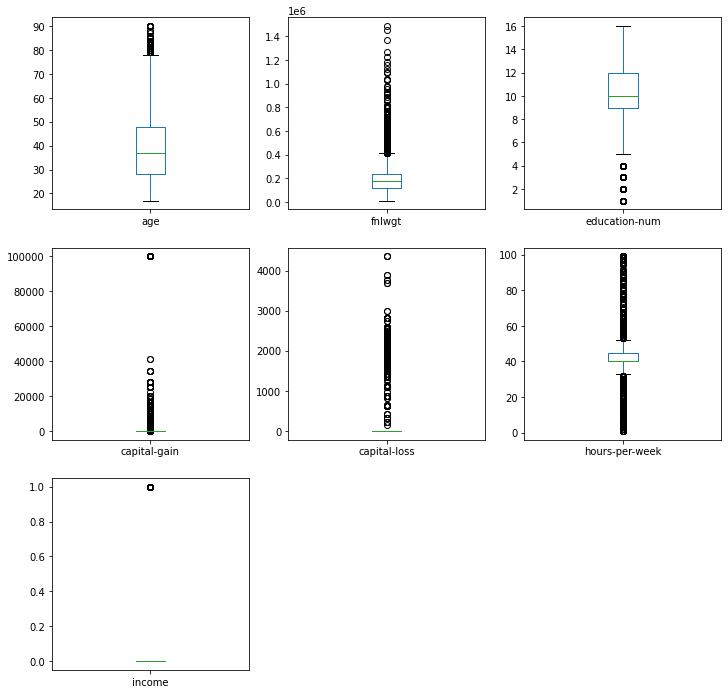

In [27]:
# Alternativa ao histograma para a visualização da concentração dos valores das variáveis

df.plot(kind ='box', figsize=(12,12), layout=(3,3), sharex=False, subplots=True)

In [28]:
# Destribuição do nível educacional
px.pie(df,values= 'education-num', names= 'education', title= 'Destribuição do nível educacional',
       color_discrete_sequence= px.colors.qualitative.Prism)

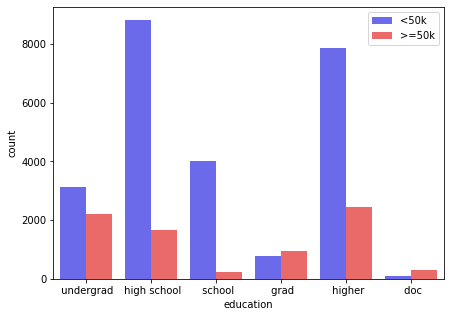

In [29]:
# Relação do nível educacional com o salário anual

plt.figure(figsize=(7,5))
ax = sns.countplot(df['education'], hue='income', data=df, palette = 'seismic')

legend_labels, _= ax.get_legend_handles_labels()
ax.legend(legend_labels, ['<50k','>=50k'], bbox_to_anchor=(1,1))

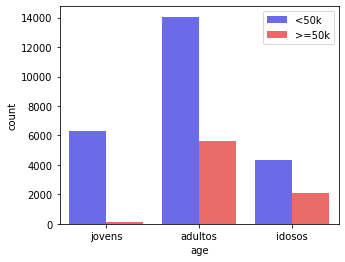

In [30]:
# Relação de idade com o salário anual

  # Para uma melhor visualização, agrupei as idades em 3 categorias:
  # 0-25 (jovens)
  # 25-50 (adultos)
  # 50-100 (idosos)

# Criando novo data frame para armazenar as idades divididas em grupos
df_idades = pd.DataFrame()
df_idades = pd.concat([df_idades,df])

# Dividindo as idades em grupos
df_idades['age'] = pd.cut(df_idades['age'], [0,25,50,100], labels= ['jovens', 'adultos', 'idosos'])

#Plotando o gráfico
plt.figure(figsize=(5,4))
ax = sns.countplot(data=df_idades, x = 'age', hue = 'income', palette= 'seismic')

legend_labels, _= ax.get_legend_handles_labels()
ax.legend(legend_labels, ['<50k','>=50k'], bbox_to_anchor=(1,1))


# **Criando os modelos**

In [31]:
X = df.drop(['income'], axis = 1)
Y = df['income']

In [32]:
from sklearn.preprocessing import StandardScaler, LabelEncoder

In [33]:
df1 = df.copy()
df1 = df1.apply(LabelEncoder().fit_transform)
df1.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,22,6,2671,5,12,1,0,1,4,1,25,0,39,38,0
1,33,5,2926,5,12,0,3,0,4,1,0,0,12,38,0
2,21,3,14086,2,8,2,5,1,4,1,0,0,39,38,0
3,36,3,15336,4,6,0,5,0,2,1,0,0,39,38,0
4,11,3,19355,5,12,0,9,5,2,0,0,0,39,4,0


In [34]:
ss = StandardScaler().fit(df1.drop('income', axis = 1))

In [35]:
X = ss.transform(df1.drop('income', axis = 1))
Y = df['income']

In [36]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.3, random_state = 40)

# **Regressão logistica**

In [40]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

rl = LogisticRegression()

modelo = rl.fit(X_train, Y_train)
predicao = modelo.predict(X_test)

print("Precisão nos dados de teste: {:,.3f}".format(rl.score(X_train, Y_train)))
print("Precisão nos dados de treino: {:,.3f}".format(rl.score(X_test, Y_test)))

Precisão nos dados de teste: 0.840
Precisão nos dados de treino: 0.833


# **Random Forest Classifier**

In [42]:
from sklearn.ensemble import RandomForestClassifier

rfc = RandomForestClassifier()

modelo1 = rfc.fit(X_train, Y_train)
predicao1 = modelo1.predict(X_test)

print("Precisão nos dados de teste: {:,.3f}".format(rfc.score(X_test, Y_test)))
print("Precisão nos dados de treino: {:,.3f}".format(rfc.score(X_train, Y_train)))

Precisão nos dados de teste: 0.856
Precisão nos dados de treino: 1.000


# **Árvore de decisão**

In [43]:
from sklearn.tree import DecisionTreeClassifier

dt = DecisionTreeClassifier()

modelo2 = dt.fit(X_train, Y_train)
predicao2 = modelo2.predict(X_test)

print("Precisão nos dados de teste: {:,.3f}".format(dt.score(X_test, Y_test)))
print("Precisão nos dados de treino: {:,.3f}".format(dt.score(X_train, Y_train)))

Precisão nos dados de teste: 0.810
Precisão nos dados de treino: 1.000
